### 5.1-3

In [3]:
import numpy as np

# 初始化 w 和 w0
w, w0 = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+w0 # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 数据集
X = np.array([[-1.8, 0.6], [0.48, -1.36], [3.68, -3.64], [1.44, 0.52], [3.42, 3.5], [-4.18, 1.68], ])
Z = X**2 # 转换为 z1z2 坐标系中的点
y = np.array([1, 1, -1, 1, -1, -1, ])

# 感知机的口袋算法
best_w, best_w0 = w, w0
best_cs = clf_score(Z, y)
epochs = 100
for _ in range(epochs):

    # 顺序遍及数据集 X
    for zi, yi in zip(Z, y):
        # 如果有分错的
        if yi*d(zi) <= 0:
            # 更新法向量 w 和 w0
            w, w0 = w + yi*zi, w0 + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(Z, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_w0 = w, w0
            break

w, w0 = best_w, best_w0
print('w0 = {}, w1 = {}, w_2 ={}'.format(w0, w[0], w[1]))

w0 = 18, w1 = -3.6035999999999966, w_2 =-8.355200000000004


### 5.1-4

In [4]:
import numpy as np
import pandas as pd


# 初始化 w 和 w0
w, w0 = np.array([0, 0, 0, 0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+w0 # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 数据集
X = np.array([[-1.8, 0.6], [0.48, -1.36], [3.68, -3.64], [1.44, 0.52], [3.42, 3.5], [-4.18, 1.68], ])
Z = np.hstack((X**2, (X[:,0]*X[:,1]).reshape(-1, 1), X, )) # 转换为 z1z2z3z4z5 坐标系中的点
y = np.array([1, 1, -1, 1, -1, -1, ])

print("特征转换后的数据集为：")
Zy = np.hstack((Z, y.reshape(-1, 1)))
df = pd.DataFrame(Zy, columns=('z1', 'z2', 'z3', 'z4', 'z5', 'y'))
print(df)

# 感知机的口袋算法
best_w, best_w0 = w, w0
best_cs = clf_score(Z, y)
epochs = 100
for _ in range(epochs):

    # 顺序遍及数据集 X
    for zi, yi in zip(Z, y):
        # 如果有分错的
        if yi*d(zi) <= 0:
            # 更新法向量 w 和 w0
            w, w0 = w + yi*zi, w0 + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(Z, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_w0 = w, w0
            break

w, w0 = best_w, best_w0
print("感知机口袋算法的结果为：")
print('w0 = {:.02f}, w1 = {:.02f}, w_2 ={:.02f}, w3={:.02f}, w4={:.02f}, w5={:.02f}'.format(w0, w[0], w[1], w[2], w[3], w[4]))

特征转换后的数据集为：
        z1       z2       z3    z4    z5    y
0   3.2400   0.3600  -1.0800 -1.80  0.60  1.0
1   0.2304   1.8496  -0.6528  0.48 -1.36  1.0
2  13.5424  13.2496 -13.3952  3.68 -3.64 -1.0
3   2.0736   0.2704   0.7488  1.44  0.52  1.0
4  11.6964  12.2500  11.9700  3.42  3.50 -1.0
5  17.4724   2.8224  -7.0224 -4.18  1.68 -1.0
感知机口袋算法的结果为：
w0 = 23.00, w1 = -0.66, w_2 =-10.56, w3=3.27, w4=-8.50, w5=-6.58


### 5.2-1

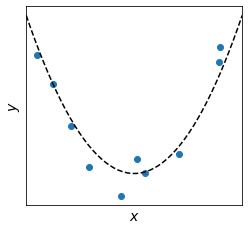

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
plt.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('$x$'),ax.set_ylabel('$y$')
ax.set_xlim(x_min, x_max)

# 绘制数据集
ax.scatter(x=X, y=y)

# 绘制上帝函数
xx = np.linspace(x_min, x_max)
ax.plot(xx, f(xx), 'k--')

plt.show()

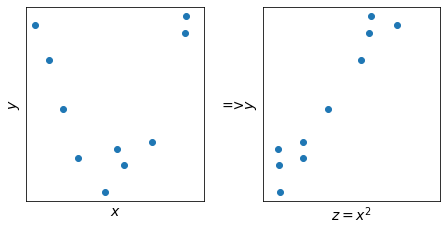

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
Z = X ** 2 # 坐标转换
y = P(X)                            # 通过 P(Y|X) 产生 y

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
plt.subplots_adjust(left=0.04, right=0.999, top=0.999, bottom=0.1, wspace=0.33)

xy_min_maxs = ((x_min, x_max), (-0.1, 1.1))
xylabels = (('$x$', '$y$'), ('$z=x^2$', '$y$'), )
Xs = (X, Z)
for ax, xylabel, xy_min_max, X in zip(axes.flat, xylabels, xy_min_maxs, Xs):
	ax.set(xticks=[], yticks=[])
	ax.set_xlabel(xylabel[0]),ax.set_ylabel(xylabel[1])
	ax.set_xlim(xy_min_max[0], xy_min_max[1])

	ax.scatter(x=X, y=y)


axes[0].text(1.2, 0.3, '=>')

plt.show()

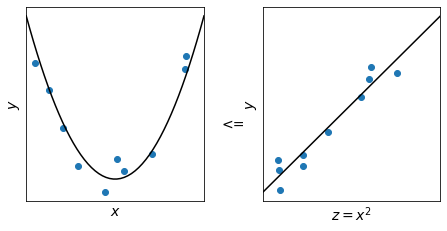

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1
z_min, z_max = -0.1, 1.1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
Z = X ** 2 # 坐标转换
y = P(X)                            # 通过 P(Y|X) 产生 y

# 绘制 xy 和 zy 下的数据集
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
plt.subplots_adjust(left=0.04, right=0.999, top=0.999, bottom=0.1, wspace=0.33)

xz_min_maxs = ((x_min, x_max), (z_min, z_max))
xylabels = (('$x$', '$y$'), ('$z=x^2$', '$y$'), )
Xs = (X, Z)
for ax, xylabel, min_max, X in zip(axes.flat, xylabels, xz_min_maxs, Xs):
	ax.set(xticks=[], yticks=[])
	ax.set_xlabel(xylabel[0]),ax.set_ylabel(xylabel[1])
	ax.set_xlim(min_max[0], min_max[1])

	ax.scatter(x=X, y=y)

# 在 zy 坐标系下，通过最小二乘法的矩阵算法来计算 w
# 给 Z 增加一行 1
Z = Z.reshape(-1, 1)
ones = np.ones(Z.shape[0]).reshape(-1, 1)
Z = np.hstack((ones, Z))

pinvZ = np.linalg.pinv(Z) # 计算伪逆
w = np.matmul(pinvZ, y) # 最小二乘法的矩阵算法

# 在 zy 坐标系下绘制直线
zz = np.linspace(z_min, z_max)
yy = w[0] + w[1]*zz
axes[1].plot(zz, yy, 'k')

# 在 xy 坐标系下绘制抛物线
xx = np.linspace(x_min, x_max)
yy = w[0] + w[1]*xx**2
axes[0].plot(xx, yy, 'k')

axes[0].text(1.2, 0.3, '<=')

plt.show()

### 5.2-2

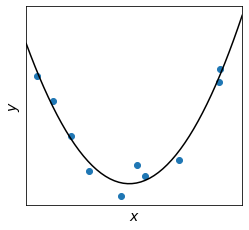

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
plt.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('$x$'),ax.set_ylabel('$y$')
ax.set_xlim(x_min, x_max)

# 绘制数据集
ax.scatter(x=X, y=y)

# 进行二次多项式回归
poly = PolynomialFeatures(degree=2)	# 建立二次多项式的坐标转换
Z = poly.fit_transform(X.reshape(-1, 1)) # 将 X 转化为 Z
LR = LinearRegression().fit(Z, y) # 在 zy 坐标系中进行线性回归

# 在 xy 坐标中绘制二次曲线
xx = np.linspace(x_min, x_max)
zz = poly.fit_transform(xx.reshape(-1, 1))
ax.plot(xx, LR.predict(zz), 'k-')

plt.show()

/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK

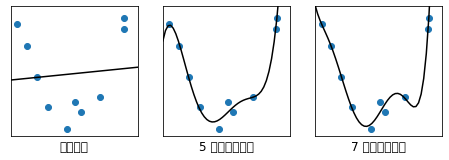

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 设置subfigure
fig, axes = plt.subplots(figsize = (6, 2), nrows=1, ncols=3)
plt.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.1)

# 多项式回归，degree 参数表示多项式的最高次数
def poly_regression(degree, ax, X, y):
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    # 建立多项式的坐标转换
	Z = poly.fit_transform(X.reshape(-1, 1))	# 将 X 转化为 Z  
	LR = LinearRegression().fit(Z, y)			# 在 zy 坐标系进行线性回归

	# 在 xy 坐标系绘制多项式曲线
	xx = np.linspace(x_min, x_max)
	zz = poly.fit_transform(xx.reshape(-1, 1))
	ax.plot(xx, LR.predict(zz), 'k-')

xlabels = ('线性回归', '5 次多项式回归', '7 次多项式回归')
degrees = (1, 5, 7) # 多项式的最高次数
for ax, xlabel, degree, in zip(axes.flat, xlabels, degrees):
	ax.set(xticks=[], yticks=[])
	ax.set_xlabel(xlabel)
	ax.set_xlim(x_min, x_max), ax.set_ylim(-0.2, 0.9)

	# 绘制数据集
	ax.scatter(x=X, y=y)
	poly_regression(degree, ax, X, y)

plt.show()

In [36]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 读取波士顿房价数据集
X, y = load_boston(return_X_y=True)

# 70% 用于训练，30% 用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

degrees = np.array([1, 2, 3, 4, 5])	# 多项式的最高次数
for degree in degrees:
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    		# 建立多项式的坐标转换
	Z_train = poly.fit_transform(X_train)				# 将 X_train 转化为 Z_train 
	LR = LinearRegression().fit(Z_train, y_train)		# 在 zy 坐标系进行线性回归

	# 在 zy 坐标系下计算测试集的
	Z_test = poly.fit_transform(X_test)					# 将 X_test 转化为 Z_test 
	y_pred = LR.predict(Z_test)							# 在 zy 坐标系下进行预测
	print('多项式的最高次数为：{}，测试集上的经验误差为：{}'.format(degree, mean_squared_error(y_pred, y_test)))

/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

多项式的最高次数为：1，测试集上的经验误差为：27.195965766883248
多项式的最高次数为：2，测试集上的经验误差为：28.93571304218183
多项式的最高次数为：3，测试集上的经验误差为：85912.07718510348
多项式的最高次数为：4，测试集上的经验误差为：546667.2171124583
多项式的最高次数为：5，测试集上的经验误差为：14811.52241188933


### 5.3-2

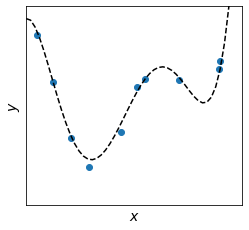

In [37]:
import matplotlib.pyplot as plt
import numpy as np

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = 0, 10

# 上帝函数 y=f(x)
def f(x):
	return x**5-22*x**4+161*x**3-403*x**2+36*x+938

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=30, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
plt.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('$x$'),ax.set_ylabel('$y$')
ax.set_xlim(x_min, x_max),ax.set_ylim(0, 1000)

# 绘制数据集
ax.scatter(x=X, y=y)

# 绘制上帝函数
xx = np.linspace(x_min, x_max)
ax.plot(xx, f(xx), 'k--')

plt.show()

/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


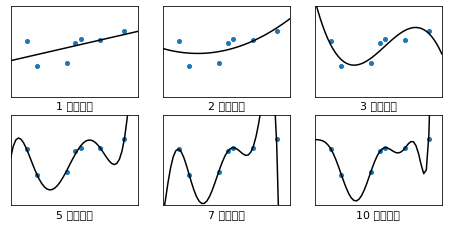

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = 0, 10

# 上帝函数 y=f(x)
def f(x):
	return x**5-22*x**4+161*x**3-403*x**2+36*x+938

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=30, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

# 设置字体大小
plt.rcParams.update({'font.size': 11})
# 设置subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=2, ncols=3)
plt.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.08)

# 多项式回归，degree 参数表示多项式的最高次数
def poly_regression(degree, ax, X, y):
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    # 建立多项式的坐标转换
	Z = poly.fit_transform(X.reshape(-1, 1))	# 将 X 转化为 Z  
	LR = LinearRegression().fit(Z, y)			# 在 zy 坐标系进行线性回归

	# 在 xy 坐标系绘制多项式曲线
	xx = np.linspace(x_min, x_max)
	zz = poly.fit_transform(xx.reshape(-1, 1))
	ax.plot(xx, LR.predict(zz), 'k-')

degrees = (1, 2, 3, 5, 7, 10) # 多项式的最高次数
for ax, degree, in zip(axes.flat, degrees):
	ax.set(xticks=[], yticks=[])
	ax.set_xlabel('{} 次多项式'.format(degree))
	ax.set_xlim(x_min, x_max),ax.set_ylim(0, 1000)

	# 绘制数据集
	ax.scatter(x=X_train, y=y_train, s=4**2)
	poly_regression(degree, ax, X_train, y_train)

plt.show()

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = 0, 10

# 上帝函数 y=f(x)
def f(x):
	return x**5-22*x**4+161*x**3-403*x**2+36*x+938

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=30, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

degrees = (1, 2, 3, 5, 7, 10) # 多项式的最高次数
for degree in degrees:
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    		    # 建立多项式的坐标转换
	Z_train = poly.fit_transform(X_train.reshape(-1, 1))    # 将 X_train 转化为 Z_train 
	LR = LinearRegression().fit(Z_train, y_train)		    # 在 zy 坐标系进行线性回归

	# 在 zy 坐标系下计算测试集的
	Z_test = poly.fit_transform(X_test.reshape(-1, 1))		# 将 X_test 转化为 Z_test 
	y_pred = LR.predict(Z_test)							    # 在 zy 坐标系下进行预测
	print('多项式的最高次数为：{}，测试集上的经验误差为：{}'.format(degree, mean_squared_error(y_pred, y_test)))

多项式的最高次数为：1，测试集上的经验误差为：94922.35091761773
多项式的最高次数为：2，测试集上的经验误差为：68036.2302171701
多项式的最高次数为：3，测试集上的经验误差为：9017.364456150466
多项式的最高次数为：5，测试集上的经验误差为：4821.151323905658
多项式的最高次数为：7，测试集上的经验误差为：105373.5205310372
多项式的最高次数为：10，测试集上的经验误差为：12405.712819443308


### 5.3-3

/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


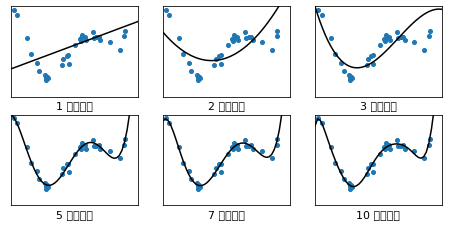

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = 0, 10

# 上帝函数 y=f(x)
def f(x):
	return x**5-22*x**4+161*x**3-403*x**2+36*x+938

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=30, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 50)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

# 设置字体大小
plt.rcParams.update({'font.size': 11})
# 设置subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=2, ncols=3)
plt.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.08)

# 多项式回归，degree 参数表示多项式的最高次数
def poly_regression(degree, ax, X, y):
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    # 建立多项式的坐标转换
	Z = poly.fit_transform(X.reshape(-1, 1))	# 将 X 转化为 Z  
	LR = LinearRegression().fit(Z, y)			# 在 zy 坐标系进行线性回归

	# 在 xy 坐标系绘制多项式曲线
	xx = np.linspace(x_min, x_max)
	zz = poly.fit_transform(xx.reshape(-1, 1))
	ax.plot(xx, LR.predict(zz), 'k-')

degrees = (1, 2, 3, 5, 7, 10) # 多项式的最高次数
for ax, degree, in zip(axes.flat, degrees):
	ax.set(xticks=[], yticks=[])
	ax.set_xlabel('{} 次多项式'.format(degree))
	ax.set_xlim(x_min, x_max),ax.set_ylim(0, 1000)

	# 绘制数据集
	ax.scatter(x=X_train, y=y_train, s=4**2)
	poly_regression(degree, ax, X_train, y_train)

plt.show()

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = 0, 10

# 上帝函数 y=f(x)
def f(x):
	return x**5-22*x**4+161*x**3-403*x**2+36*x+938

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=30, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 50)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

degrees = (1, 2, 3, 5, 7, 10) # 多项式的最高次数
for degree in degrees:
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    		    # 建立多项式的坐标转换
	Z_train = poly.fit_transform(X_train.reshape(-1, 1))    # 将 X_train 转化为 Z_train 
	LR = LinearRegression().fit(Z_train, y_train)		    # 在 zy 坐标系进行线性回归

	# 在 zy 坐标系下计算测试集的
	Z_test = poly.fit_transform(X_test.reshape(-1, 1))		# 将 X_test 转化为 Z_test 
	y_pred = LR.predict(Z_test)							    # 在 zy 坐标系下进行预测
	print('多项式的最高次数为：{}，测试集上的经验误差为：{}'.format(degree, mean_squared_error(y_pred, y_test)))

多项式的最高次数为：1，测试集上的经验误差为：69302.13930154055
多项式的最高次数为：2，测试集上的经验误差为：37991.32593575171
多项式的最高次数为：3，测试集上的经验误差为：23266.002623488897
多项式的最高次数为：5，测试集上的经验误差为：967.8656307127442
多项式的最高次数为：7，测试集上的经验误差为：990.6270081600568
多项式的最高次数为：10，测试集上的经验误差为：808.7782460259259


### 5.4-7

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = 0, 10

# 上帝函数 y=f(x)
def f(x):
	return x**5-22*x**4+161*x**3-403*x**2+36*x+938

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=30, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 50)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

degrees = (1, 2, 3, 5, 7, 10) # 多项式的最高次数
for degree in degrees:
	# 在 zy 坐标系进行线性回归
	poly = PolynomialFeatures(degree=degree)    		    # 建立多项式的坐标转换
	Z_train = poly.fit_transform(X_train.reshape(-1, 1))    # 将 X_train 转化为 Z_train 
	LR = LinearRegression().fit(Z_train, y_train)		    # 在 zy 坐标系进行线性回归

	# 在 zy 坐标系下计算测试集的
	Z_test = poly.fit_transform(X_test.reshape(-1, 1))		# 将 X_test 转化为 Z_test 
	y_pred = LR.predict(Z_test)							    # 在 zy 坐标系下进行预测
	print('多项式的最高次数为：{}，测试集上的经验误差为：{}'.format(degree, mean_squared_error(y_pred, y_test)))

多项式的最高次数为：1，测试集上的经验误差为：69302.13930154055
多项式的最高次数为：2，测试集上的经验误差为：37991.32593575171
多项式的最高次数为：3，测试集上的经验误差为：23266.002623488897
多项式的最高次数为：5，测试集上的经验误差为：967.8656307127442
多项式的最高次数为：7，测试集上的经验误差为：990.6270081600568
多项式的最高次数为：10，测试集上的经验误差为：808.7782460259259


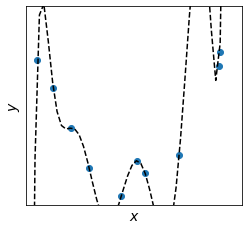

In [43]:
import matplotlib.pyplot as plt
import numpy as np

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

# 利用范德蒙行列式进行特征转换
Z = np.vander(X, 11, increasing=True)

# 在转换后的坐标系下完成最小二乘法
pinvZ = np.linalg.pinv(Z) 	# 计算伪逆
w = pinvZ @ y 				# 最小二乘法的矩阵算法

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
plt.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('$x$'),ax.set_ylabel('$y$')
ax.set_xlim(x_min, x_max),ax.set_ylim(-0.2, 1.1)

# 绘制数据集 D
ax.scatter(x=X, y=y)

# 绘制拟合的 10 次多项式曲线
def h(xx):
	return w[0]+w[1]*xx+w[2]*xx**2+w[3]*xx**3+w[4]*xx**4+w[5]*xx**5+w[6]*xx**6+w[7]*xx**7+w[8]*xx**8+w[9]*xx**9+w[10]*xx**10
xx = np.linspace(x_min, x_max)
ax.plot(xx, h(xx), 'k--')

plt.show()

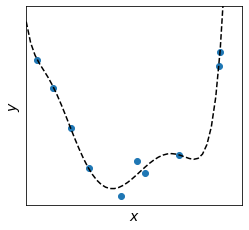

In [55]:
import matplotlib.pyplot as plt
import numpy as np

lambVal = 0.0001 # 岭回归中的 lambda，越大对模型复杂度的惩罚越大

rnd = np.random.RandomState(3)	# 为了演示，采用固定的随机
x_min, x_max = -1, 1

# 上帝函数 y=f(x)
def f(x):
	return x**2

# 上帝分布 P(Y|X)
def P(X):
	return f(X) + rnd.normal(scale=0.1, size=X.shape)

# 通过 P(X, Y) 生成数据集 D
X = rnd.uniform(x_min, x_max, 10)   # 通过均匀分布产生 X
y = P(X)                            # 通过 P(Y|X) 产生 y

# 利用范德蒙行列式进行特征转换
Z = np.vander(X, 11, increasing=True)

# 在转换后的坐标系下完成岭回归
zTz = Z.T @ Z
I = np.eye(zTz.shape[0])
w = np.linalg.inv(zTz + lambVal*I) @ Z.T @ y

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
plt.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('$x$'),ax.set_ylabel('$y$')
ax.set_xlim(x_min, x_max),ax.set_ylim(-0.2, 1.1)

# 绘制数据集 D
ax.scatter(x=X, y=y)

# 绘制拟合的 10 次多项式曲线
def h(xx):
	return w[0]+w[1]*xx+w[2]*xx**2+w[3]*xx**3+w[4]*xx**4+w[5]*xx**5+w[6]*xx**6+w[7]*xx**7+w[8]*xx**8+w[9]*xx**9+w[10]*xx**10
xx = np.linspace(x_min, x_max)
ax.plot(xx, h(xx), 'k--')

plt.show()

### 5.6-2

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_91606/489605779.py:66: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)


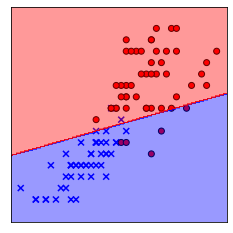

In [56]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets

# 初始化权重向量 w 
w = np.array([0, 0, 0])

# 定义 d(x) 函数
def d(x):
    return x @ w.reshape(-1, 1) # 利用矩阵乘法来完成点积

# 定义 h(x) 函数
def h(x):
    return np.sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 载入iris数据集
iris = datasets.load_iris()
# 取前面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = np.insert(iris.data[50:50+sampleNumber, [2,3]], 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)			# 将鸢尾花的两种类别转为-1和1

# 感知机的口袋算法
best_w = w
best_cs = clf_score(X, y)
epochs = 2000
for _ in range(epochs):

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新权重向量w 
            w = w + yi*xi
            # 对新得到的决策边界进行评分
            cs = clf_score(X, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w = w
            break

w = best_w

# 下面是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])

# 绘制数据集
markers = ('x', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

# 绘制决策区域
resolution = 0.01
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
x2_min, x2_max = X[:, 2].min() - 0.2, X[:, 2].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
xx = np.insert(np.column_stack((xx1.ravel(), xx2.ravel())), 0, 1, axis=1)
yy = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, yy, alpha=0.4, cmap=cm)

plt.show()

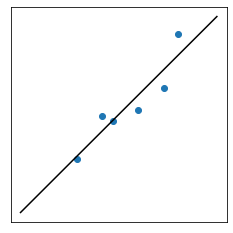

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 父子身高数据集
X0 = np.array([1.51, 1.64, 1.6, 1.73, 1.82, 1.87]).reshape(-1, 1)
X = np.insert(X0, 0, 1, axis=1)	# 构造 X，即给 X0 增加一行 1
y = np.array([1.63, 1.7, 1.71, 1.72, 1.76, 1.86])

pinvX = np.linalg.pinv(X)   # 计算伪逆
w = pinvX @ y               # 最小二乘法的矩阵算法

# 下面是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])

# 绘制数据集
ax.scatter(x=X0, y=y)
# 绘制回归直线
def h(x):
	return w[0]+w[1]*x
x_min, x_max = X0.min() - 0.2, X0.max() + 0.2
xx = np.arange(x_min, x_max, 0.1)
ax.plot(xx, h(xx), 'k')

plt.show()

### 5.6-3

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_91606/4140131312.py:75: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_91606/4140131312.py:75: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure

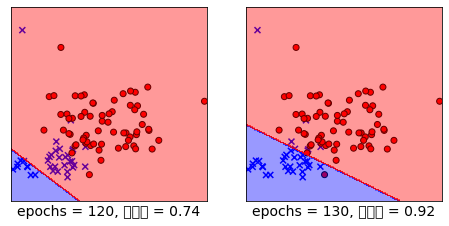

In [58]:
# POCKET
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score

# 定义 d(x) 函数
def d(x):
    return x @ w.reshape(-1, 1) # 利用矩阵乘法来完成点积

# 定义 h(x) 函数
def h(x):
    return np.sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 载入breast_cancer数据集
breast_cancer = datasets.load_breast_cancer()
# 取前面100个数据，并且只取两个特征，以及取出对应的类别
sampleNumber = 100
X = np.insert(breast_cancer.data[:sampleNumber, [0,26]], 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.where(breast_cancer.target[:sampleNumber] == 1, -1, 1)			# 将两种类别转为-1和1

# 口袋算法
def pocket_class(epochs):
	# 初始化权重向量 w 
	global w 
	w = np.array([0, 0, 0])

	# 感知机的口袋算法
	best_w = w
	best_cs = clf_score(X, y)
	for _ in range(epochs):

	    # 顺序遍及数据集 X
	    for xi, yi in zip(X, y):
	        # 如果有分错的
	        if yi*d(xi) <= 0:
	            # 更新权重向量w 
	            w = w + yi*xi
	            # 对新得到的决策边界进行评分
	            cs = clf_score(X, y)
	            # 如果更好，则进行更新
	            if cs > best_cs:
	                best_cs = cs
	                best_w = w
	            break
	w = best_w

# 下面是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
fig.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.1)

epochses = (120, 130)
for ax, epochs, in zip(axes.flat, epochses):
	# 用不同的超参数来调用口袋算法
	pocket_class(epochs)

	ax.set(xticks=[], yticks=[])
	ax.set_xlabel('epochs = {}, 准确率 = {}'.format(epochs, accuracy_score(y, h(X))))

	# 绘制数据集
	markers = ('x', 'o')
	vmin, vmax = min(y), max(y)
	cm = ListedColormap(('blue', 'red'))
	for cl, m in zip(np.unique(y), markers):
		ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

	# # 绘制决策区域
	resolution = 0.01
	x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
	x2_min, x2_max = X[:, 2].min() - 0.2, X[:, 2].max() + 0.2
	xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
	xx = np.insert(np.column_stack((xx1.ravel(), xx2.ravel())), 0, 1, axis=1)
	yy = h(xx).reshape(xx1.shape)
	ax.contourf(xx1, xx2, yy, alpha=0.4, cmap=cm)

plt.show()

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_91606/1564743564.py:50: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36807 (\N{CJK UNIFIED IDEOGRAPH-8FC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from 

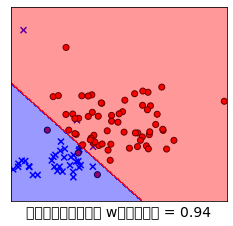

In [59]:
# LSM
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score

# 初始化权重向量 w 
w = np.array([0, 0, 0])

# 定义 d(x) 函数
def d(x):
    return x @ w.reshape(-1, 1) # 利用矩阵乘法来完成点积

# 定义 h(x) 函数
def h(x):
    return np.sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 载入breast_cancer数据集
breast_cancer = datasets.load_breast_cancer()
# 取前面100个数据，并且只取两个特征，以及取出对应的类别
sampleNumber = 100
X = np.insert(breast_cancer.data[:sampleNumber, [0,26]], 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.where(breast_cancer.target[:sampleNumber] == 1, -1, 1)			# 将两种类别转为-1和1

# 通过最小二乘法求出 w
pinvX = np.linalg.pinv(X)   # 计算伪逆
w = pinvX @ y               # 最小二乘法的矩阵算法

# # 下面是绘制代码
# # 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('通过最小二乘法得到 w，其准确率 = {}'.format(accuracy_score(y, h(X))))

# 绘制数据集
markers = ('x', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

# # 绘制决策区域
resolution = 0.01
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
x2_min, x2_max = X[:, 2].min() - 0.2, X[:, 2].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
xx = np.insert(np.column_stack((xx1.ravel(), xx2.ravel())), 0, 1, axis=1)
yy = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, yy, alpha=0.4, cmap=cm)

plt.show()

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_91606/4192597501.py:73: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from 

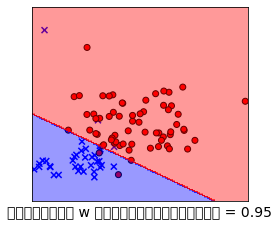

In [60]:
# LSM + POCKET
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score

# 初始化权重向量 w 
w = np.array([0, 0, 0])

# 定义 d(x) 函数
def d(x):
    return x @ w.reshape(-1, 1) # 利用矩阵乘法来完成点积

# 定义 h(x) 函数
def h(x):
    return np.sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 载入breast_cancer数据集
breast_cancer = datasets.load_breast_cancer()
# 取前面100个数据，并且只取两个特征，以及取出对应的类别
sampleNumber = 100
X = np.insert(breast_cancer.data[:sampleNumber, [0,26]], 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.where(breast_cancer.target[:sampleNumber] == 1, -1, 1)			# 将两种类别转为-1和1

# 通过线性回归，即最小二乘法求出 w
pinvX = np.linalg.pinv(X)   # 计算伪逆
w = pinvX @ y               # 最小二乘法的矩阵算法

# 感知机的口袋算法
best_w = w 					# 将最小二乘法求出 w 作为初始
best_cs = clf_score(X, y)
epochs = 90
for _ in range(epochs):

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新权重向量w 
            w = w + yi*xi
            # 对新得到的决策边界进行评分
            cs = clf_score(X, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w = w
            break

w = best_w

# # 下面是绘制代码
# # 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1)
ax.set(xticks=[], yticks=[])
ax.set_xlabel('在最小二乘法求出 w 基础上再进行口袋算法，其准确率 = {}'.format(accuracy_score(y, h(X))))

# 绘制数据集
markers = ('x', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

# # 绘制决策区域
resolution = 0.01
x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
x2_min, x2_max = X[:, 2].min() - 0.2, X[:, 2].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
xx = np.insert(np.column_stack((xx1.ravel(), xx2.ravel())), 0, 1, axis=1)
yy = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, yy, alpha=0.4, cmap=cm)

plt.show()